In this project, I worked on predicting if a customer would accept an invitation or not. 

## Classification on Sweepstakes Customers

Since we are basically predicting on brands willingness to invite with another brand, we can try a classification problem on status(accpeted/rejected). 

In [43]:
%config IPCompleter.greedy=True
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [44]:
# loading data
data = pd.read_csv('sweepstakes_category.csv')
data.head()

,campaign_id,gap_months,minimum_entries_required,prizing_value,days_pushed,nb_viewers,nb_participants,participants,partic_list_sizes,nb_pending_invites_duplicate_column_name_1,nb_pending_invites,nb_total_invites,invite_apps_ratio,response_rate
0,3439.0,0.0,0.0,1000.0,0.0,NaN,2.0,"3368, 2436","125225, 3600000",0,0,22,1.0,0.388889
1,431.0,0.0,0.0,0.0,0.0,NaN,5.0,"117, 506, 554, 49, 194","200000, 700000, 1000000, 1000000, 145000",0,0,0,1.0,1.000000
2,3239.0,0.0,0.0,5000.0,0.0,NaN,6.0,"49, 690, 131, 1416, 149, 4","1000000, 600000, 350000, 600000, 400000, 1000000",0,0,8,1.0,0.166667
3,3224.0,0.0,0.0,3500.0,0.0,1.0,8.0,"2650, 2231, 1582, 4209, 3215, 3223, 4028, 1770","60000, 95000, 80000, 25000, 250000, 25000, 109...",0,0,53,1.0,0.353383
4,2943.0,0.0,0.0,4500.0,0.0,1.0,7.0,"2971, 1641, 2505, 691, 2169, 215, 2241","40000, 30000, 70000, 100000, 77000, 230000, 20...",0,0,54,1.0,0.405660


Data Preprocessing

In [45]:
participants = data['participants'].str.split(',', expand = True)
list_size = data['partic_list_sizes'].str.split(',', expand = True)

In [46]:
list_size.fillna(0, inplace = True)
list_size = list_size.astype(int)
data['total_list_size'] = list_size.sum(axis = 1)
data['avg_list_size'] = list_size.mean(axis = 1)

In [47]:
participants.fillna(0, inplace = True)
participants = participants.astype(int)
data['total_par_counts'] = participants.nunique(axis = 1)


In [48]:
data.head()

,campaign_id,gap_months,minimum_entries_required,prizing_value,days_pushed,nb_viewers,nb_participants,participants,partic_list_sizes,nb_pending_invites_duplicate_column_name_1,nb_pending_invites,nb_total_invites,invite_apps_ratio,response_rate,total_list_size,avg_list_size,total_par_counts
0,3439.0,0.0,0.0,1000.0,0.0,NaN,2.0,"3368, 2436","125225, 3600000",0,0,22,1.0,0.388889,3725225,266087.500000,3
1,431.0,0.0,0.0,0.0,0.0,NaN,5.0,"117, 506, 554, 49, 194","200000, 700000, 1000000, 1000000, 145000",0,0,0,1.0,1.000000,3045000,217500.000000,6
2,3239.0,0.0,0.0,5000.0,0.0,NaN,6.0,"49, 690, 131, 1416, 149, 4","1000000, 600000, 350000, 600000, 400000, 1000000",0,0,8,1.0,0.166667,3950000,282142.857143,7
3,3224.0,0.0,0.0,3500.0,0.0,1.0,8.0,"2650, 2231, 1582, 4209, 3215, 3223, 4028, 1770","60000, 95000, 80000, 25000, 250000, 25000, 109...",0,0,53,1.0,0.353383,1136098,81149.857143,9
4,2943.0,0.0,0.0,4500.0,0.0,1.0,7.0,"2971, 1641, 2505, 691, 2169, 215, 2241","40000, 30000, 70000, 100000, 77000, 230000, 20...",0,0,54,1.0,0.405660,747000,53357.142857,8


In [49]:
data2 = data[['campaign_id','prizing_value', 'response_rate', 'nb_participants', 'total_list_size','avg_list_size']]
data3 = pd.read_pickle('sweepstakes_features_2019_08_05.pickle')
data4 = pd.merge(data3, data2, on = 'campaign_id', how = 'left')

In [50]:
data4.head()

,campaign_id,hostbrand_id,invitee_id,status,idx_invite,brand_id,dojomojo_tags,dedicated_list_size,ntfs_provided,ntfs_acquired,...,dojomojo_tags_invitee,dedicated_list_size_invitee,ntfs_provided_invitee,ntfs_acquired_invitee,google_tags_invitee,prizing_value,response_rate,nb_participants,total_list_size,avg_list_size
0,1.0,51.0,51.0,accepted,1,51,[],500000.0,None,None,...,[],500000.0,None,None,[],0.0,1.0,1.0,500000.0,35714.285714
1,22.0,51.0,51.0,accepted,1,51,[],500000.0,None,None,...,[],500000.0,None,None,[],0.0,1.0,1.0,500000.0,35714.285714
2,23.0,3.0,51.0,accepted,3,3,"[Alcoholic Beverages, Food & Beverages, Media]",1100000.0,2085.27142857142857160000,18906,...,[],500000.0,None,None,[],0.0,1.0,3.0,1760000.0,125714.285714
3,2.0,10.0,10.0,accepted,1,10,"[Tech & Electronics, Advertising & Marketing, ...",1.0,None,None,...,"[Tech & Electronics, Advertising & Marketing, ...",1.0,None,None,[],0.0,1.0,1.0,1.0,0.071429
4,2.0,10.0,6.0,rejected,2,10,"[Tech & Electronics, Advertising & Marketing, ...",1.0,None,None,...,[],0.0,None,None,[],0.0,1.0,1.0,1.0,0.071429


In [51]:
df = data4[['dedicated_list_size', 'ntfs_provided','ntfs_acquired', 'dedicated_list_size_invitee','ntfs_provided_invitee','ntfs_acquired_invitee','response_rate', 'nb_participants','total_list_size', 'avg_list_size','prizing_value']]

In [52]:
df.head()

,dedicated_list_size,ntfs_provided,ntfs_acquired,dedicated_list_size_invitee,ntfs_provided_invitee,ntfs_acquired_invitee,response_rate,nb_participants,total_list_size,avg_list_size,prizing_value
0,500000.0,None,None,500000.0,None,None,1.0,1.0,500000.0,35714.285714,0.0
1,500000.0,None,None,500000.0,None,None,1.0,1.0,500000.0,35714.285714,0.0
2,1100000.0,2085.27142857142857160000,18906,500000.0,None,None,1.0,3.0,1760000.0,125714.285714,0.0
3,1.0,None,None,1.0,None,None,1.0,1.0,1.0,0.071429,0.0
4,1.0,None,None,0.0,None,None,1.0,1.0,1.0,0.071429,0.0


In [53]:
df.fillna(df.mean(), inplace = True)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
mms = MinMaxScaler()
X = mms.fit_transform(df)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [55]:
le = LabelEncoder()
Y = le.fit_transform(data4[['status']])

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
Y

array([0, 0, 0, ..., 3, 2, 2])

In [57]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [58]:
y_train

array([3, 3, 3, ..., 3, 3, 3])

In [59]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc.feature_importances_

array([0.07885472, 0.0657419 , 0.05624639, 0.09967452, 0.11445362,
       0.12288454, 0.17065802, 0.06228449, 0.06556254, 0.06872526,
       0.09491398])

From now on, I worked on choosing and operate on some of the features iteratively, so I have 4 models in total in this projects. I would compare them at the model selection part

#### Feature Engineering

In [61]:
for x in df.columns:
    print(x)

dedicated_list_size
ntfs_provided
ntfs_acquired
dedicated_list_size_invitee
ntfs_provided_invitee
ntfs_acquired_invitee
response_rate
nb_participants
total_list_size
avg_list_size
prizing_value


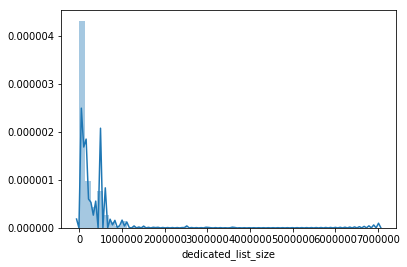

In [62]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.distplot(np.round(df['dedicated_list_size']))

In [63]:
df['dedicated_list_size'] = df['dedicated_list_size'].apply(lambda x: np.log(x))

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [219]:
viz = pd.DataFrame(X)

7,

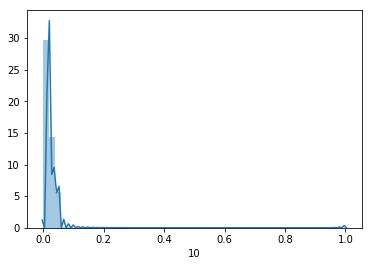

In [225]:
sb.distplot(viz[10])

In [228]:
df2 = df.drop(['nb_participants', 'total_list_size'], axis = 1)
df2.head()

,dedicated_list_size,ntfs_provided,ntfs_acquired,dedicated_list_size_invitee,ntfs_provided_invitee,ntfs_acquired_invitee,response_rate,avg_list_size,prizing_value
0,500000.0,0,0,500000.0,0,0,1.0,35714.285714,0.0
1,500000.0,0,0,500000.0,0,0,1.0,35714.285714,0.0
2,1100000.0,2085.27142857142857160000,18906,500000.0,0,0,1.0,125714.285714,0.0
3,1.0,0,0,1.0,0,0,1.0,0.071429,0.0
4,1.0,0,0,0.0,0,0,1.0,0.071429,0.0


In [229]:
X2 = mms.fit_transform(df2)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [262]:
x2_train, x2_test, y_train,y_test = train_test_split(X2, Y, test_size = 0.3)

In [234]:
rfc2 = RandomForestClassifier(n_estimators = 100)
rfc2.fit(x2_train, y_train)
rfc2.score(x2_test, y_test)

0.9642946551508323

In [237]:
rfc2.feature_importances_

array([0.09032935, 0.07727837, 0.0650756 , 0.10305798, 0.11831104,
       0.13083076, 0.19470442, 0.11538621, 0.10502627])

In [267]:
viz2 = pd.DataFrame(X2)

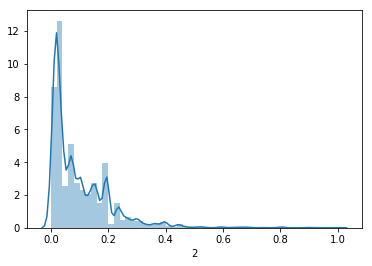

In [268]:
sb.distplot(viz[2])

In [252]:
df3 = df2.drop(['ntfs_acquired'], axis = 1)
X3 = mms.fit_transform(df3)
x3_train, x3_test, y_train, y_test = train_test_split(X3, Y, test_size = 0.3)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [253]:
rfc3 = RandomForestClassifier(n_estimators = 100)
rfc3.fit(x3_train, y_train)
rfc3.score(x3_test, y_test)

0.9636062085367381

In [266]:
rfc3.feature_importances_

array([0.10321817, 0.09808364, 0.10579494, 0.11811792, 0.13178965,
       0.20000292, 0.13075916, 0.11223359])

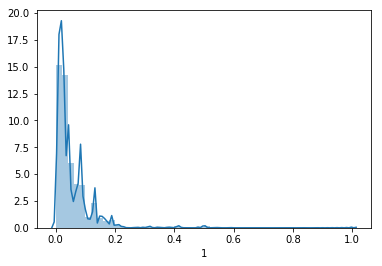

In [277]:
viz3 = pd.DataFrame(X3)
sb.distplot(viz[1])


In [274]:
df4 = df3
df4['ntfs_provided'] = df3['ntfs_provided'].replace(to_replace = 0, value = df['ntfs_provided'].mean())

In [290]:
df4.head()

,dedicated_list_size,ntfs_provided,dedicated_list_size_invitee,ntfs_provided_invitee,ntfs_acquired_invitee,response_rate,avg_list_size,prizing_value
0,500000.0,2649,500000.0,0,0,1.0,35714.285714,0.0
1,500000.0,2649,500000.0,0,0,1.0,35714.285714,0.0
2,1100000.0,2085,500000.0,0,0,1.0,125714.285714,0.0
3,1.0,2649,1.0,0,0,1.0,0.071429,0.0
4,1.0,2649,0.0,0,0,1.0,0.071429,0.0


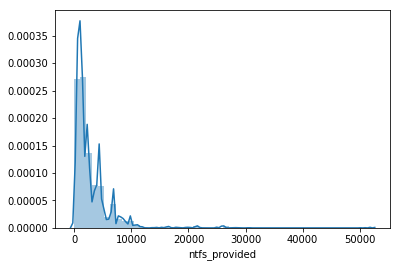

In [282]:
df4['ntfs_provided'] = df4['ntfs_provided'].astype(int)
sb.distplot(df4['ntfs_provided'])

In [288]:
X4 = mms.fit_transform(df4)
x4_train, x4_test = train_test_split(X4, test_size = 0.3)


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[7.14285714e-02, 5.09691452e-02, 1.53969011e-03, ...,
        1.00000000e+00, 2.70211846e-02, 0.00000000e+00],
       [7.14285714e-02, 5.09691452e-02, 1.53969011e-03, ...,
        1.00000000e+00, 2.70211846e-02, 0.00000000e+00],
       [1.57142857e-01, 4.01131792e-02, 1.53969011e-03, ...,
        1.00000000e+00, 9.51145698e-02, 0.00000000e+00],
       ...,
       [1.85714286e-03, 5.09691452e-02, 4.31113230e-05, ...,
        1.87500000e-01, 7.02550800e-04, 3.00000000e-02],
       [4.28571429e-02, 1.35487845e-01, 3.07938021e-03, ...,
        1.00000000e+00, 1.62127108e-02, 3.00000000e-02],
       [4.28571429e-02, 1.35487845e-01, 3.07938021e-03, ...,
        1.00000000e+00, 1.62127108e-02, 3.00000000e-02]])

In [286]:
rfc4 = RandomForestClassifier(n_estimators = 100)
rfc4.fit(x4_train, y_train)
rfc4.score(x4_test, y_test)

0.6692952810113907

In [287]:
rfc4.feature_importances_

array([0.06449889, 0.07445978, 0.19371377, 0.1803138 , 0.18385906,
       0.1036129 , 0.11447249, 0.08506932])

### F-1 score

In [235]:
from sklearn.metrics import f1_score

In [172]:
y_true = y_test
y_pred = rfc.predict(x_test)
f1_score(y_true, y_pred, average = 'micro')

0.963355864313431

In [263]:
y_true = y_test
y_pred2 = rfc2.predict(x2_test)
f1_score(y_true, y_pred2, average = 'micro')

0.9890161472024033

In [254]:
y_true = y_test
y_pred3 = rfc3.predict(x3_test)
f1_score(y_true, y_pred3, average = 'micro')

0.9636062085367381

### Accuracy

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.963355864313431

### Cross_validation

In [297]:
import sklearn.metrics
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

rf1

In [188]:
np.mean(cross_val_score(rfc, x_train, y_train, scoring= 'f1_micro', cv = 5))

0.953181269391665

In [300]:
np.mean(cross_val_score(rfc, x_train, y_train, scoring= 'accuracy', cv = 5))

0.6856928375799972

rf2

In [305]:
np.mean(cross_val_score(rfc2, x2_train, y_train, scoring= 'f1_micro', cv = 5))

0.9455099777788938

In [301]:
np.mean(cross_val_score(rfc2, x2_train, y_train, scoring= 'accuracy', cv = 5))

0.9454161071485

rf3

In [256]:
np.mean(cross_val_score(rfc3, x3_train, y_train, scoring= 'f1_micro', cv = 5))

0.9533554953057515

In [304]:
np.mean(cross_val_score(rfc3, x3_train, y_train, scoring= 'accuracy', cv = 5))

0.6857867972649277

rf4

In [291]:
np.mean(cross_val_score(rfc4, x4_train, y_train, scoring= 'f1_micro', cv = 5))

0.6866719283412077

In [303]:
np.mean(cross_val_score(rfc4, x4_train, y_train, scoring= 'accuracy', cv = 5))

0.6867255638198115

## Parameter Tuning

In [309]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [50, 100, 200], 'min_samples_leaf':[ 1, 2, 3], 'max_depth': [5,10, None], 'random_state':[0, 42, None]}
rfc_cv = GridSearchCV(rfc2, params, cv = 3, scoring = 'accuracy')
rfc_cv.fit(x2_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'min_samples_leaf': [1, 2, 3], 'max_depth': [5, 10, None], 'random_state': [0, 42, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [310]:
rfc_cv.score(x2_test, y_test)

0.9611027663036675

In [311]:
accuracy_score(y_test,rfc_cv.predict(x2_test))

0.9611027663036675

#### Confusion Matrix

In [318]:
from sklearn.metrics import confusion_matrix
viz_data = confusion_matrix(y_test,rfc_cv.predict(x2_test))

In [323]:
pd.DataFrame(viz_data)

,0,1,2,3
0,4994,2,10,835
1,0,31,14,0
2,2,2,1348,39
3,294,0,45,24340


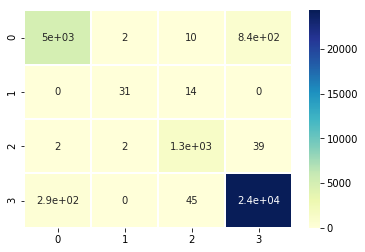

In [322]:
sb.heatmap(viz_data, linewidths = 1, annot = True, cmap = 'YlGnBu')

In [331]:
le.inverse_transform([0,1,2,3])

array([0, 1, 2, 3])

In [333]:
filename = 'sweepstakes_clf_model.pickle'
pickle.dump(rfc_cv, open(filename, 'wb'))